## Observations and Insights 

In [282]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata,study_results)

# Display the data table for preview

df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [283]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [284]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.loc[df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [285]:
# Optional: Get all the data for the duplicate mouse ID. 
#df.drop_duplicates(subset=["Mouse ID","Timepoint"])
df.loc[df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [286]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df.loc[df['Mouse ID']!='g989']
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [287]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

248

## Summary Statistics

In [288]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean=df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median=df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_sem=df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_var=df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std=df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#pd.concat([tumor_mean, tumor_median, tumor_sem, tumor_std, tumor_var], axis=1)
pd.DataFrame({'Tumor Volume Mean': tumor_mean, 'Tumor Volume Median': tumor_median, 'Tumor Volume SEM': tumor_sem
             , 'Tumor Volume Variance': tumor_var, 'Tumor Volume Std': tumor_std
             })

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume SEM,Tumor Volume Variance,Tumor Volume Std
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


In [289]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'sem', 'var', 'std']})

Tumor Volume (mm3)                                          
                           mean     median       sem        var       std
Drug Regimen                                                             
Capomulin             40.675741  41.557809  0.329346  24.947764  4.994774
Ceftamin              52.591172  51.776157  0.469821  39.290177  6.268188
Infubinol             52.884795  51.820584  0.492236  43.128684  6.567243
Ketapril              55.235638  53.698743  0.603860  68.553577  8.279709
Naftisol              54.331565  52.509285  0.596466  66.173479  8.134708
Placebo               54.033581  52.288934  0.581331  61.168083  7.821003
Propriva              52.320930  50.446266  0.544332  43.852013  6.622085
Ramicane              40.216745  40.673236  0.320955  23.486704  4.846308
Stelasyn              54.233149  52.431737  0.573111  59.450562  7.710419
Zoniferol             53.236507  51.818479  0.516398  48.533355  6.966589

## Bar and Pie Charts

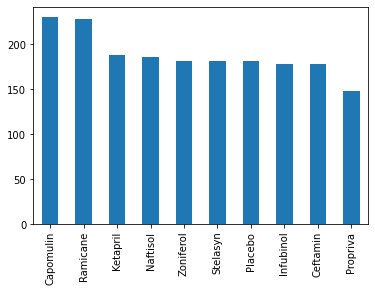

In [290]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
df['Drug Regimen'].value_counts().plot(kind='bar')


Text(0.5, 0, 'Drug')

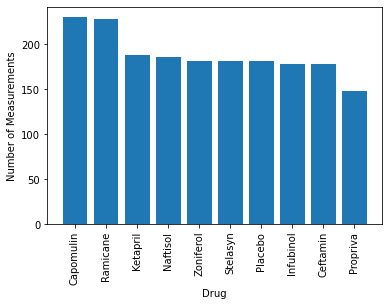

In [291]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_reg=df['Drug Regimen'].value_counts()
plt.bar(drug_reg.index, drug_reg.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Measurements')
plt.xlabel('Drug')

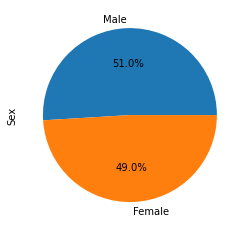

In [292]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x1e7940d52b0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

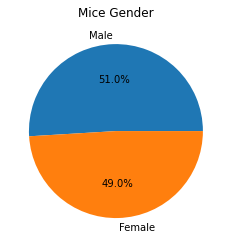

In [293]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender=df['Sex'].value_counts()
plt.title("Mice Gender")
plt.pie(mice_gender, labels=mice_gender.index, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [294]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_times = df.groupby('Mouse ID', as_index=False )['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_times.merge(df)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [315]:
drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drugs in drugs:

    tmp=df.loc[df['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    quartiles = tmp.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tmp.loc[(tmp>upper_bound) | (tmp<lower_bound)]
    
    print(f'Outliers for {drugs}: {outliers}')
    

Outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ramicane: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Outliers for Infubinol: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drugs in drugs:

    tmp=df.loc[df['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    quartiles = tmp.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tmp.loc[(tmp>upper_bound) | (tmp<lower_bound)]
    
    print(f'Outliers for {drugs}: {outliers}')


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#group by mouse id and calculate average weight for each mouse and average tumor volume

## Correlation and Regression

In [301]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
df_capomulin = df[df['Drug Regimen']== 'Capomulin']
df_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [308]:
st.pearsonr(df_capomulin['Weight (g)'],df_capomulin['Tumor Volume (mm3)'])

(0.525699555207717, 9.605446629502006e-18)